# TP10 - ICA

In [1]:
# -*- coding: utf-8 -*-

# Author: Slim Essid

In [8]:
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import wave

from sklearn import decomposition
from sklearn.decomposition import FastICA

### Question 1

In [14]:
# -- Read audio data ----------------------------------------------------------

def wavread(filename):
    wf = wave.open(filename)
    s = np.frombuffer(wf.readframes(wf.getnframes()), dtype=np.int16)
    wf.close()
    return s
    
def wavwrite(filename, s, nchannels=1):
    wf = wave.open(filename,'wb')
    wf.setnchannels(nchannels)
    wf.setsampwidth(2)
    wf.setframerate(32000)
    s = s/max(abs(s))*2**14 # normalise arbitrarily
    wf.writeframes(s.astype(np.int16).tobytes())
    wf.close()
    
s1 = wavread('./snd/es02.wav')
s2 = wavread('./snd/si01.wav')

# -- Create stereo mix ---------------------------------------------------------

nsmp = min(len(s1), len(s2))
s1 = s1[:nsmp]
s2 = s2[:nsmp]
S = np.c_[s1, s2]
# Mixing matrix 
A = np.array([ [0.6, 0.5],
            [0.4, 0.5]
            ])
# Do the mix
X = S.dot(A)
# Write mix file
x = np.zeros(2*nsmp)
x[::2] = X[:,0]
x[1::2] = X[:,1]

# Write mix file
wavwrite('./snd/mix.wav', x, nchannels=2)

### Question 2 / 3

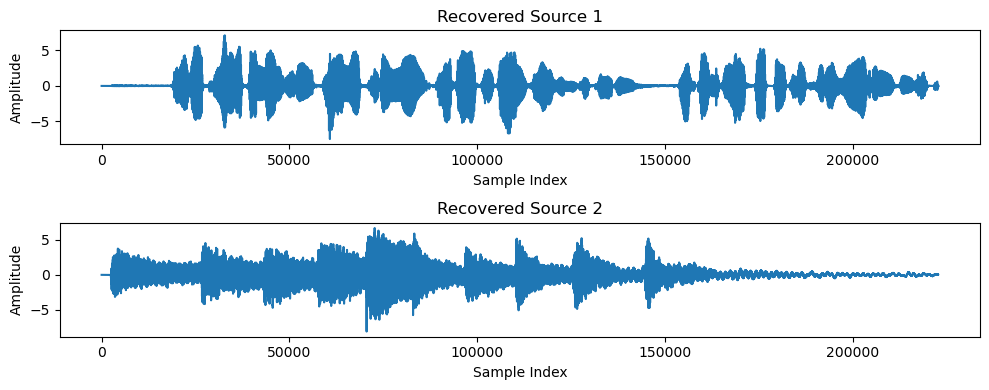

In [15]:
# Load the mixed audio signal
mixed_signal = wavread('./snd/mix.wav')  # Adjust path to your mixed audio file
X = np.c_[mixed_signal[::2], mixed_signal[1::2]]

# Apply FastICA
ica = FastICA(n_components=2)
S_ = ica.fit_transform(X)  # Get the estimated sources
A_ = ica.mixing_  # Get estimated mixing matrix

# Normalize the separated signals
S_ = S_ / S_.std(axis=0)

# Visualize sources
plt.figure(figsize=(10, 4))

# Plot the first separated source
plt.subplot(2, 1, 1)
plt.title('Recovered Source 1')
plt.plot(S_[:,0])
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

# Plot the second separated source
plt.subplot(2, 1, 2)
plt.title('Recovered Source 2')
plt.plot(S_[:,1])
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Write audio sources
wavwrite('./snd/recovered_source_1.wav', S_[:,0], nchannels=1)  # Adjust path to save the first source
wavwrite('./snd/recovered_source_2.wav', S_[:,1], nchannels=1)  # Adjust path to save the second source